# MLE challenge - Train model notebook

### Notebook 2

In this notebook, we train the model with a few features (for reasons of time and complexity in solving the challenge). It also shows how to persist the model in a file, load it into memory and then make a predict.



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, recall_score, 
    plot_confusion_matrix, precision_score, plot_roc_curve
)

from sklearn.ensemble import RandomForestClassifier

#### Read dataset

In [2]:
df = pd.read_csv('train_model.csv')

In [3]:
df.head()

,id,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car,status
0,5008804,33,12.0,0.0,NaN,1,0
1,5008804,33,12.0,1.0,102.283361,1,0
2,5008804,33,12.0,2.0,119.442705,1,0
3,5008804,33,12.0,3.0,117.873035,1,0
4,5008804,33,12.0,4.0,114.289538,1,0


<AxesSubplot:>

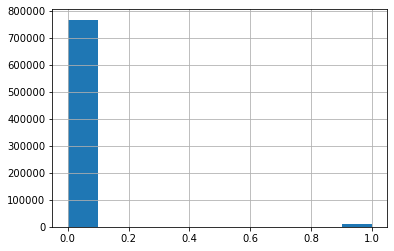

In [4]:
df.status.hist()

<AxesSubplot:>

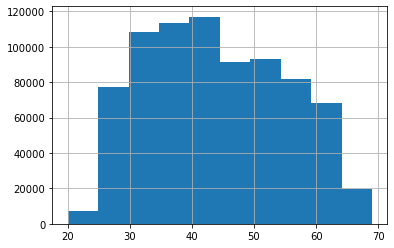

In [5]:
df.age.hist()

In [6]:
df.years_on_the_job.min(),df.years_on_the_job.max()

(0.0, 43.0)

In [7]:
df.years_on_the_job

0         12.0
1         12.0
2         12.0
3         12.0
4         12.0
          ... 
777710     6.0
777711     6.0
777712     6.0
777713     6.0
777714     6.0
Name: years_on_the_job, Length: 777715, dtype: float64

<AxesSubplot:>

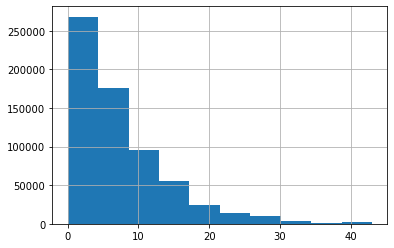

In [8]:
df.years_on_the_job.hist()

In [9]:
cust_df = df.copy()

In [10]:
cust_df.fillna(0, inplace=True)

## Train model
#### Error detected the id must be dropped!  Is not a feature

In [11]:
Y = cust_df['status']

cust_df.drop(['status','id'], axis=1, inplace=True)

X = cust_df

In [12]:
# Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.
Y = Y.astype('int')
X_balance, Y_balance = SMOTE().fit_resample(X, Y)
X_balance = pd.DataFrame(X_balance, columns=X.columns)

In [13]:
X_balance

,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car
0,33,12.000000,0.000000,0.000000,1
1,33,12.000000,1.000000,102.283361,1
2,33,12.000000,2.000000,119.442705,1
3,33,12.000000,3.000000,117.873035,1
4,33,12.000000,4.000000,114.289538,1
...,...,...,...,...,...
1532275,36,3.775640,12.000000,132.776331,0
1532276,42,1.471543,26.471543,144.216398,0
1532277,35,13.000000,33.164904,129.883443,0
1532278,37,2.883123,1.941561,114.042766,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,Y_balance, 
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state = 123)

In [25]:
X_train.columns

Index(['age', 'years_on_the_job', 'nb_previous_loans',
       'avg_amount_loans_previous', 'flag_own_car'],
      dtype='object')

Accuracy Score is 0.96409
Precision Score is 0.9603
Recall Score is 0.9603
        0       1
0  220642    9200
1    7308  222534


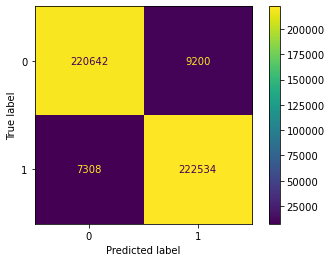

In [15]:
model = RandomForestClassifier(n_estimators=5)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(precision_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model, X_test, y_test)  
plt.show()


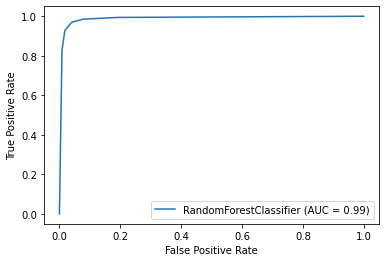

In [16]:
plot_roc_curve(model, X_test, y_test)
plt.show()

## Model persistance

In [17]:
from joblib import dump, load

In [18]:
# dump model
dump(model, 'model_risk.joblib') 

['model_risk.joblib']

### Load model & predict

In [19]:
my_model = load('model_risk.joblib') 

In [20]:
# example dict 'user_id' -> features
d = {
    '5008804': [32, 12, 2, 119.45, 1],
    '5008807': [29, 2, 1, 100, 0]
}

In [21]:
my_model.predict(np.array(d['5008807']).reshape(1,-1))

array([0])

In [22]:
[d['5008807']]

[[29, 2, 1, 100, 0]]

In [23]:
my_model.predict([d['5008807']])

array([0])